In [1]:
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getClosestEdge(x,y,edges):
    r,c = edges.shape
    queue = [(x,y,0)]
    vis = set()
    while queue:
        i,j,d = queue.pop(0)
        if((i,j) in vis):
            continue
        if(not(0<=i<r and 0<=j<c)):
            continue
        if(edges[i,j]==255):
            return [d,(i,j)]
        vis.add((i,j))
        queue+=[((i+1,j,d+1))]
        queue+=[((i-1,j,d+1))]
        queue+=[((i,j+1,d+1))]
        queue+=[((i,j-1,d+1))]

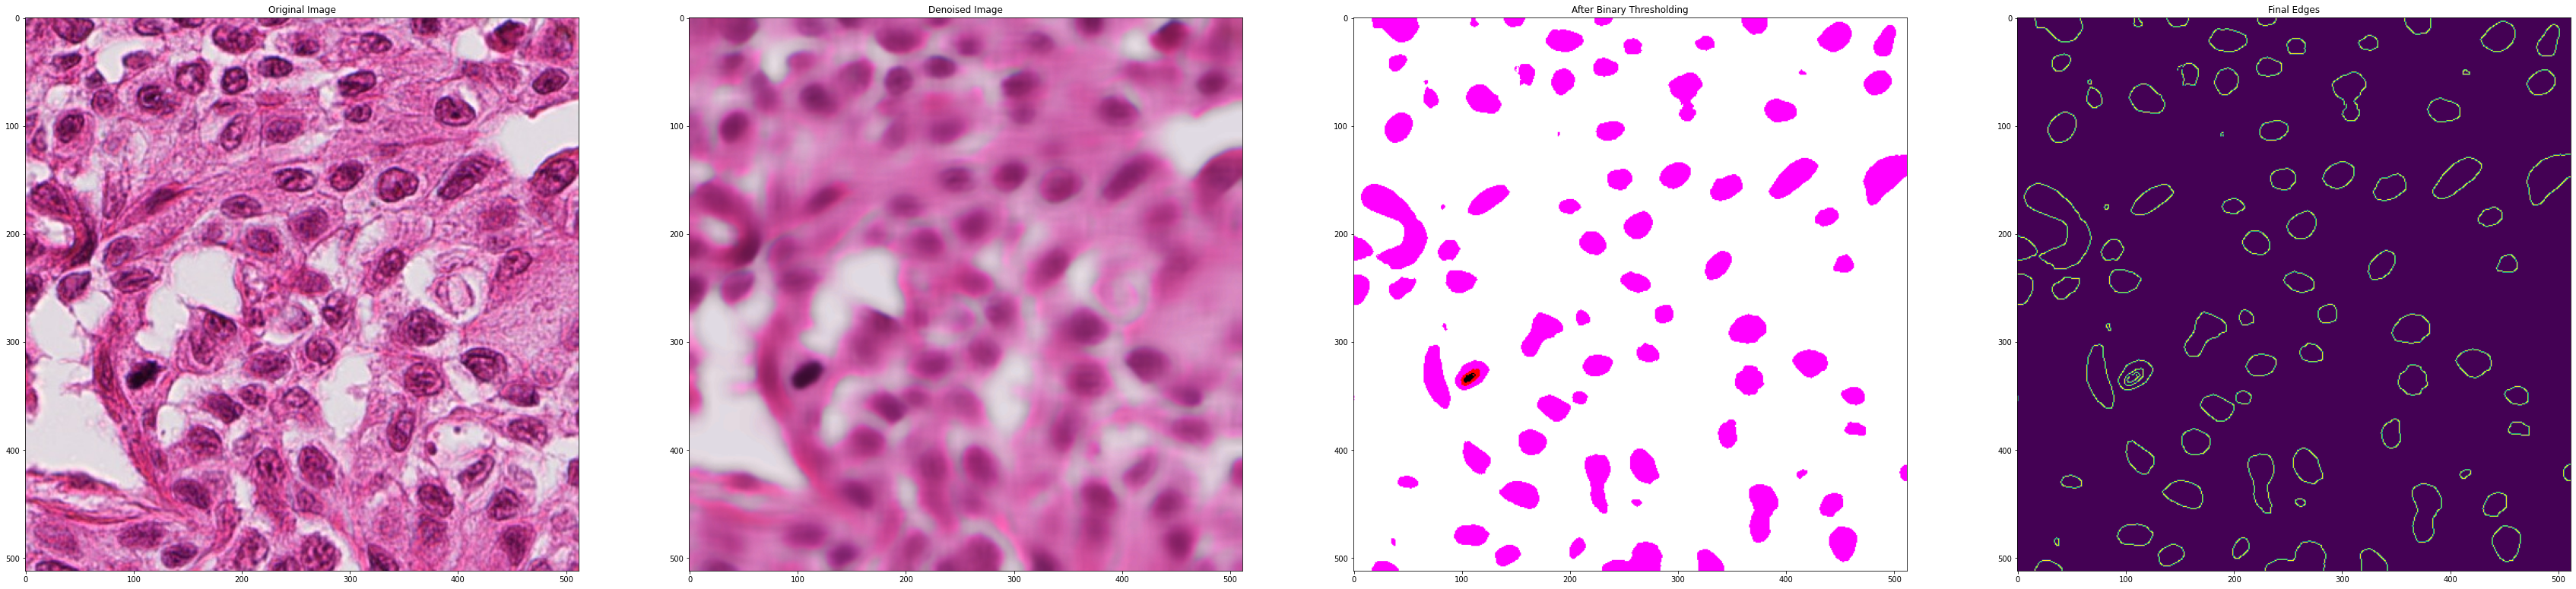

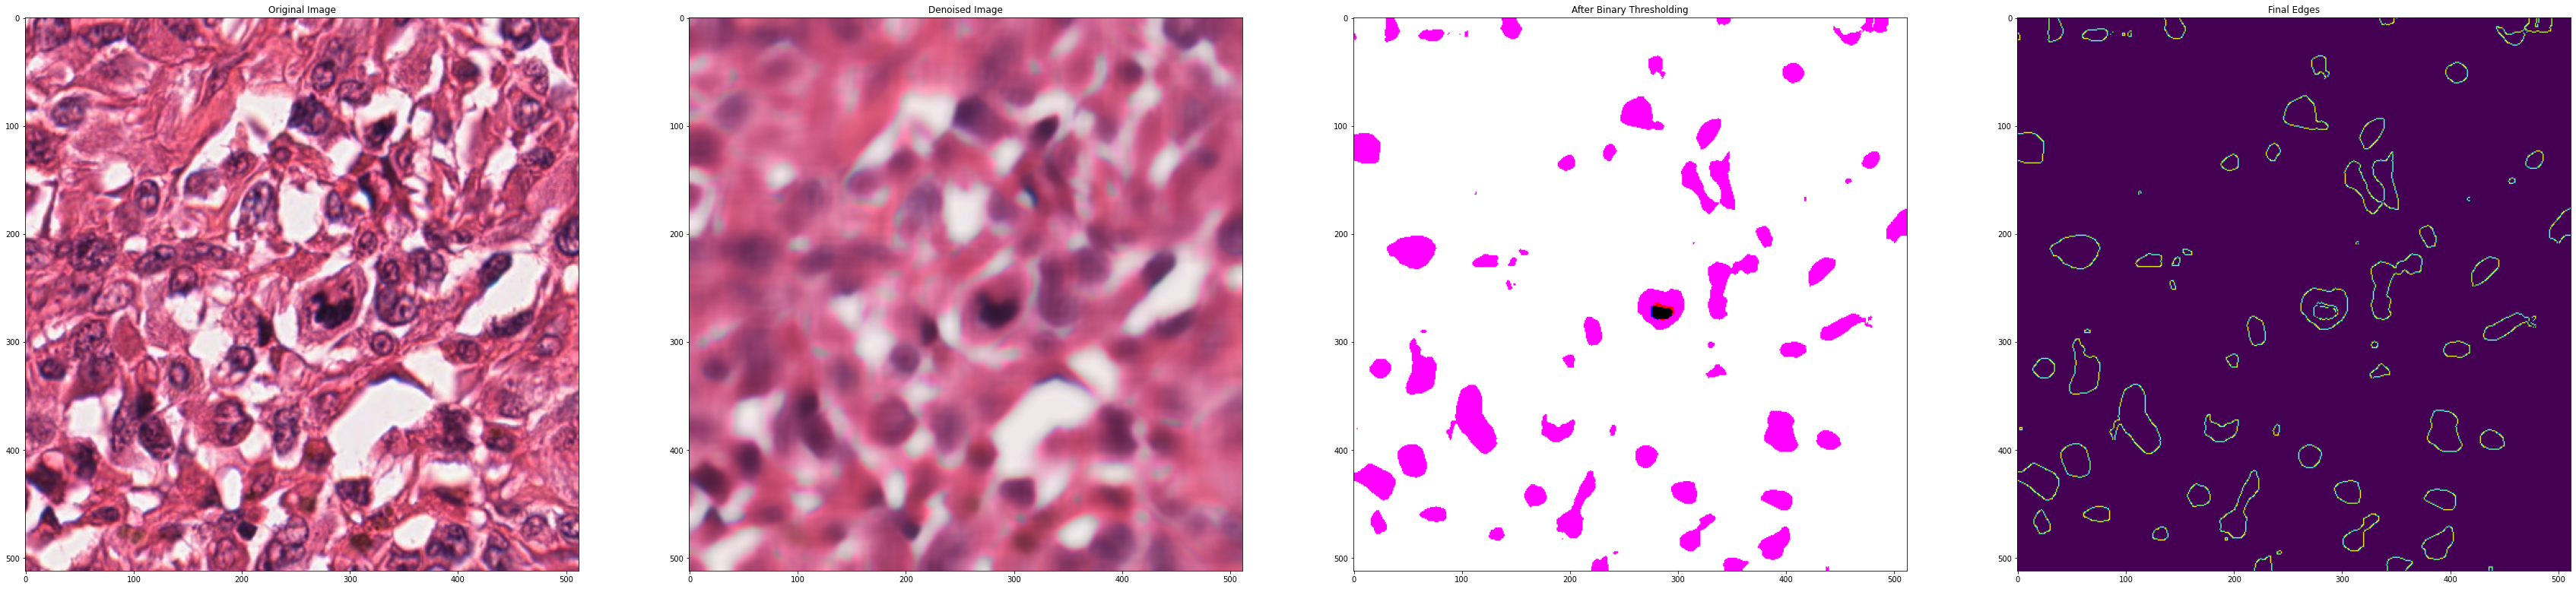

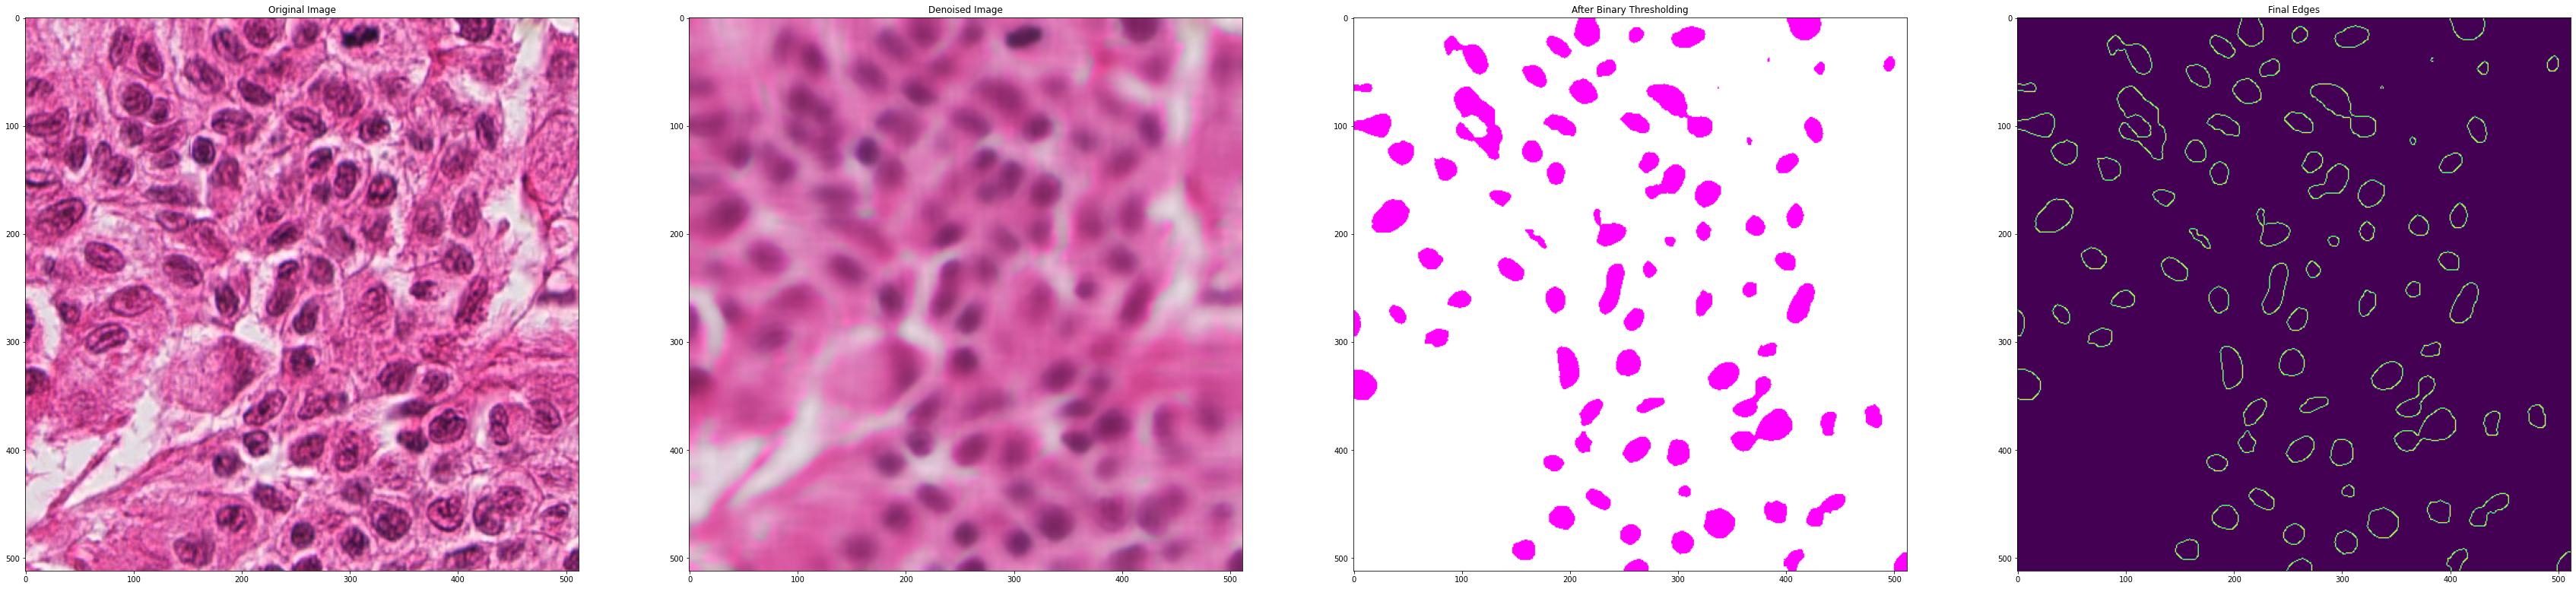

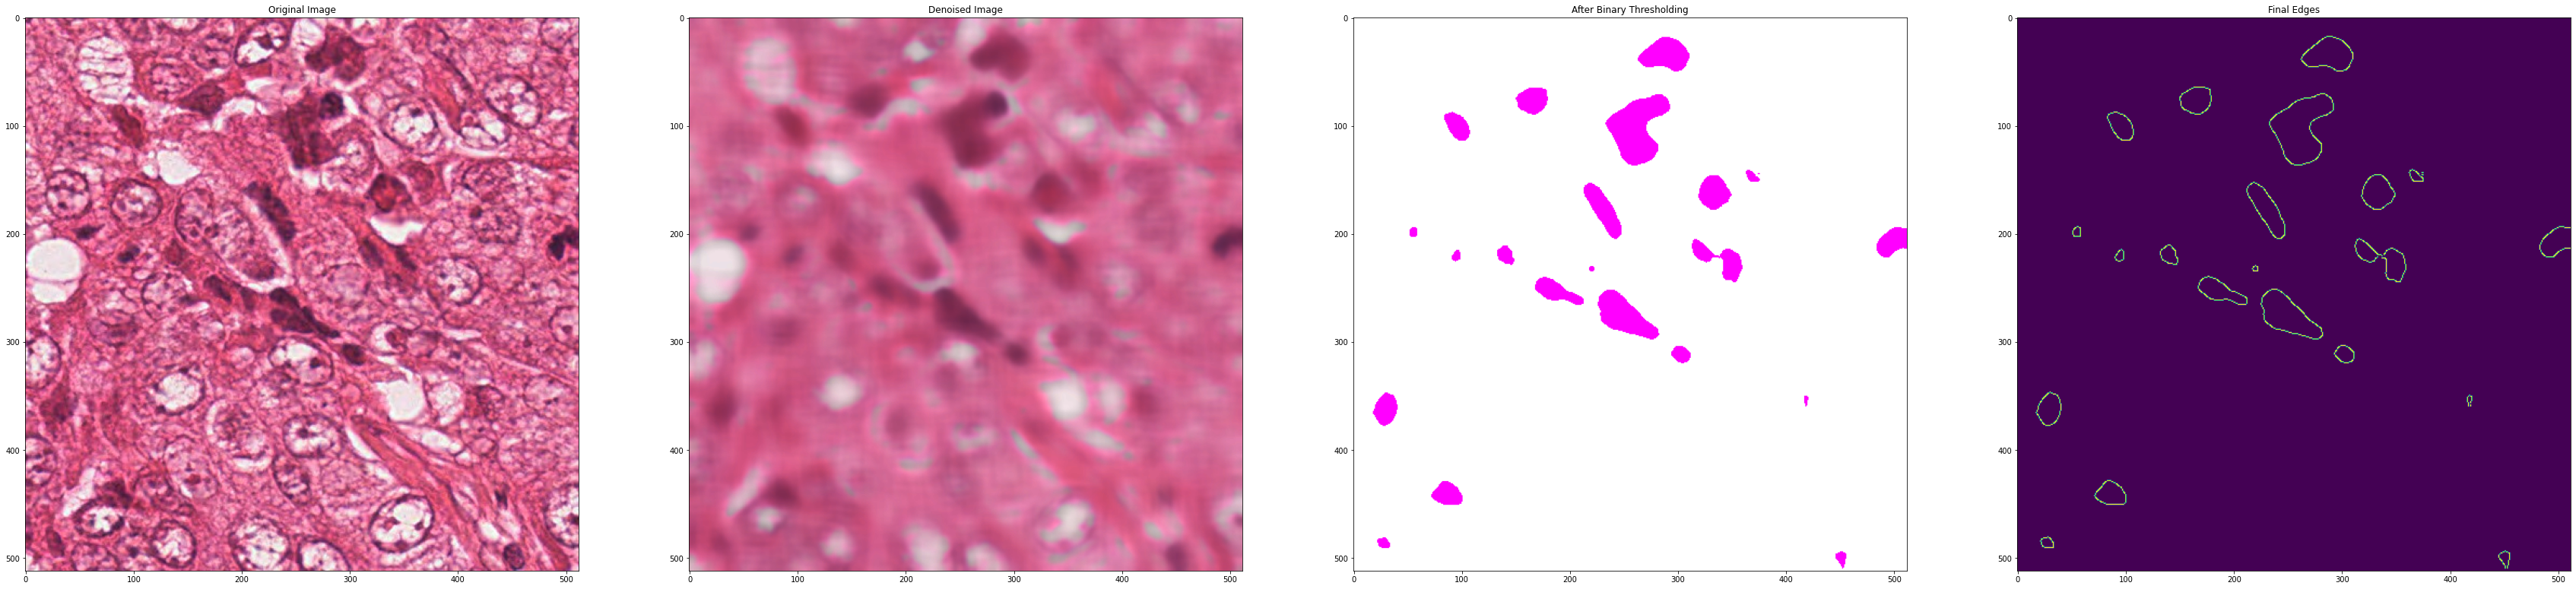

In [3]:
edl = []
imgs = []
for x in range(1,5):
    image = cv2.imread('uploads/{}.jpeg'.format(x),-1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgs+=[image]
    image_de = cv2.fastNlMeansDenoisingColored(image,None,80,10,7,21)
    ret,th1 = cv2.threshold(image_de,60,255,cv2.THRESH_BINARY)
    edges = cv2.Canny(th1,127,255)
    edl+=[edges]
    plt.figure(figsize=(60,60))
    plt.subplot(1,4,1)
    plt.gca().set_title("Original Image")
    plt.imshow(image)
    plt.subplot(1,4,2)
    plt.gca().set_title("Denoised Image")
    plt.imshow(image_de)
    plt.subplot(1,4,3)
    plt.gca().set_title("After Binary Thresholding")
    plt.imshow(th1)
    plt.subplot(1,4,4)
    plt.gca().set_title("Final Edges")
    plt.imshow(edges)
    plt.show()

In [ ]:
for x in range(5):
    s = set()
    r,c = edl[0].shape
    for x in range(r):
        for y in range(c):
            s.add(edl[0][x,y])
    print(s)

In [ ]:
print(len(imgs),len(edl))

In [4]:
import random as rd

In [ ]:
for x in range(4):
    tx,ty = rd.randint(0,r-1),rd.randint(0,c-1)
    res = getClosestEdge(tx,ty,edl[x])
    px,py = res[1]
    assert edl[x][px,py]==255
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(imgs[x])
    plt.subplot(1,2,2)
    plt.scatter(ty,tx,color='red',s=40)
    plt.scatter(py,px,color='green',s=40)
    plt.imshow(edl[x])
    plt.show()

In [ ]:
tx,ty = rd.randint(0,r-1),rd.randint(0,c-1)
res = getClosestEdge(tx,ty,edl[x])
px,py = res[1]